In [1]:
!pip install kaggle

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 96%|███████████████████████████████████████▏ | 156M/163M [00:01<00:00, 115MB/s]
100%|█████████████████████████████████████████| 163M/163M [00:01<00:00, 110MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/kaggle/working/face-mask-dataset.zip'

zip_ref = ZipFile(dataset,'r')
zip_ref.extractall('/kaggle/working')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split

2024-07-23 11:43:45.504555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 11:43:45.504684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 11:43:45.664378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
data=[]
labels=[]
with_mask='/kaggle/working/data/with_mask/'
with_mask_file=os.listdir(with_mask)
count=0
for images in with_mask_file:
  if count==2000:
    break
  image=Image.open(with_mask+images)
  image=image.resize((128,128))
  image = image.convert('RGB')
  image=np.array(image)
  data.append(image)
  labels.append(1)
  count=count+1

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
without_mask='/kaggle/working/data/without_mask/'
without_mask_file=os.listdir(without_mask)
count=0
for images in without_mask_file:
  if count==2000:
    break
  image=Image.open(without_mask+images)
  image=image.resize((128,128))
  image = image.convert('RGB')
  image=np.array(image)
  data.append(image)
  labels.append(0)
  count=count+1


In [7]:
X=np.array(data)
y=np.array(labels)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)

(3200, 128, 128, 3)
(800, 128, 128, 3)


In [10]:
y_test.shape

(800,)

In [11]:
print (y_train.shape)

(3200,)


In [12]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [13]:
print(labels.count(0))
print(labels.count(1))

2000
2000


In [84]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6827 - loss: 1.2952 - val_accuracy: 0.8000 - val_loss: 0.5277
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8337 - loss: 0.3836 - val_accuracy: 0.8712 - val_loss: 0.3007
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8823 - loss: 0.2698 - val_accuracy: 0.8863 - val_loss: 0.3000
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8666 - loss: 0.2906 - val_accuracy: 0.8788 - val_loss: 0.3553
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8896 - loss: 0.2576 - val_accuracy: 0.9000 - val_loss: 0.3021
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9028 - loss: 0.2418 - val_accuracy: 0.8950 - val_loss: 0.3592
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8946 - loss: 0.2518 - val_accuracy: 0.8850 - val_loss: 0.2945
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9144 - loss: 0.1982 - val_accu

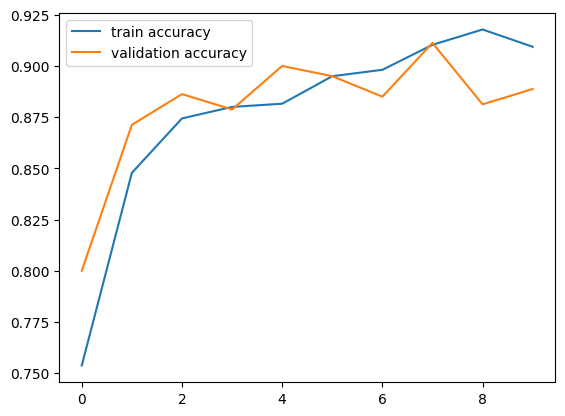

In [86]:
h = history

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [87]:
def preprocessing (image):
  image=Image.open(image)
  image=image.resize((128,128))
  image = image.convert('RGB')
  image=np.expand_dims(image,axis=0)
  image=np.array(image)
  return image
    

In [93]:
prediction=model.predict(preprocessing('/kaggle/input/images/images.jpeg'))
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1


In [94]:
model.save('my_model.h5')